# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#Import Numpy to calculate statistics
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice. has to be 249 mice
numMice = combined_data['Mouse ID'].nunique()
numMice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Extract the unique Mouse IDs from the duplicate_mice DataFrame
duplicate_mouse_df = duplicateMice['Mouse ID'].unique()
duplicate_mouse_df

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseData = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_mouse_df)]
duplicate_mouseData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedData = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleanedData.head()

#Used duplicate_metadata = mouse_metadata[mouse_metadata.duplicated(['Mouse ID'])] to check duplicate rows
#Used duplicate_results = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])] to check for duplicate rows

#The mouse with ID g989 has duplicate entries for different timepoints, causing a discrepancy in number of mice, thus
#dropping rows associated with the particular mouse ID from both csv dataframes, will help get the accurate number of mice

# Drop rows with 'g989' from study_results
study_results_cleaned = study_results[study_results['Mouse ID'] != 'g989']

# Drop rows with 'g989' from mouse_metadata
mouse_metadata_cleaned = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']

# Merge the cleaned data
combined_data_cleaned = pd.merge(study_results_cleaned, mouse_metadata_cleaned, how='left')
combined_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
numMice_cleaned = combined_data_cleaned['Mouse ID'].nunique()
numMice_cleaned

248

## Summary Statistics

In [7]:
#Check the dtypes to see if the Tumor Volume(mm3) needs to be changed to float
combined_data_cleaned.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [8]:
# Generate a summary statistics table of mean, median, variance, 
#standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the 
#following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#Groupby
summary_stats = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)']

#Summary Statistics Table
mean_tumorVolume = summary_stats.mean()
median_tumorVolume = summary_stats.median()
variance_tumorVolume = summary_stats.var()
std_dev_tumorVolume = summary_stats.std()
sem_tumorVolume = summary_stats.sem()

# Assemble the resulting series into a single summary DataFrame
# Create a summary DataFrame
summary_statsDf = pd.DataFrame({
    'Mean Tumor Volume': mean_tumorVolume,
    'Median Tumor Volume': median_tumorVolume,
    'Tumor Volume Variance': variance_tumorVolume,
    'Tumor Volume Std. Dev.': std_dev_tumorVolume,
    'Tumor Volume Std. Err.': sem_tumorVolume}).reset_index()

# Set 'Drug Regimen' as the index
summary_statsDf = summary_statsDf.set_index('Drug Regimen')

summary_statsDf.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data_cleaned.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

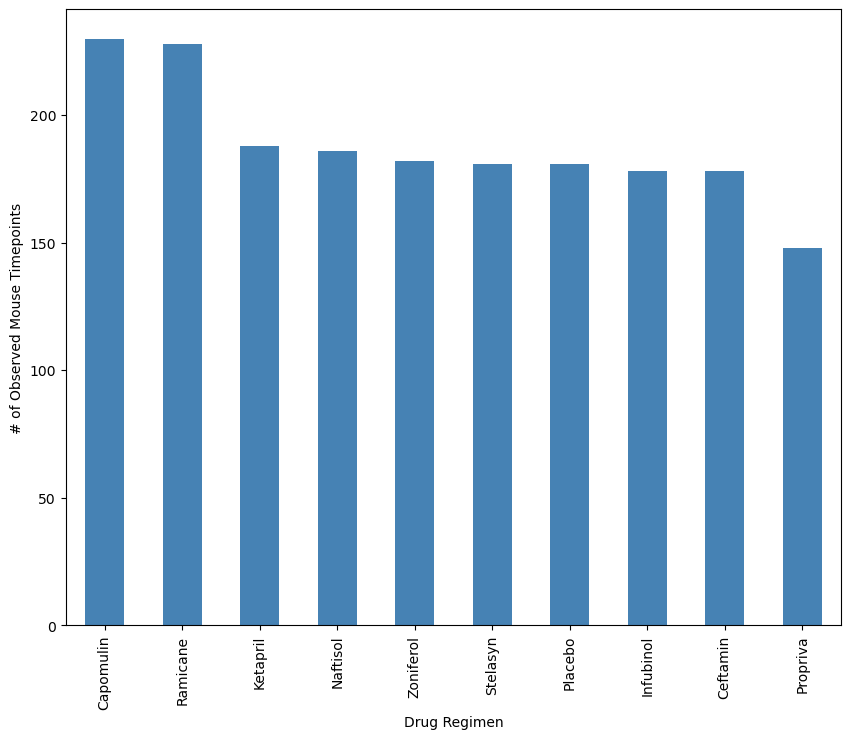

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Groupby 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = combined_data_cleaned['Drug Regimen'].value_counts()

# Creating a bar plot
regimen_counts.plot(kind='bar', color='SteelBlue', figsize=(10, 8))

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Show the plot
plt.show()

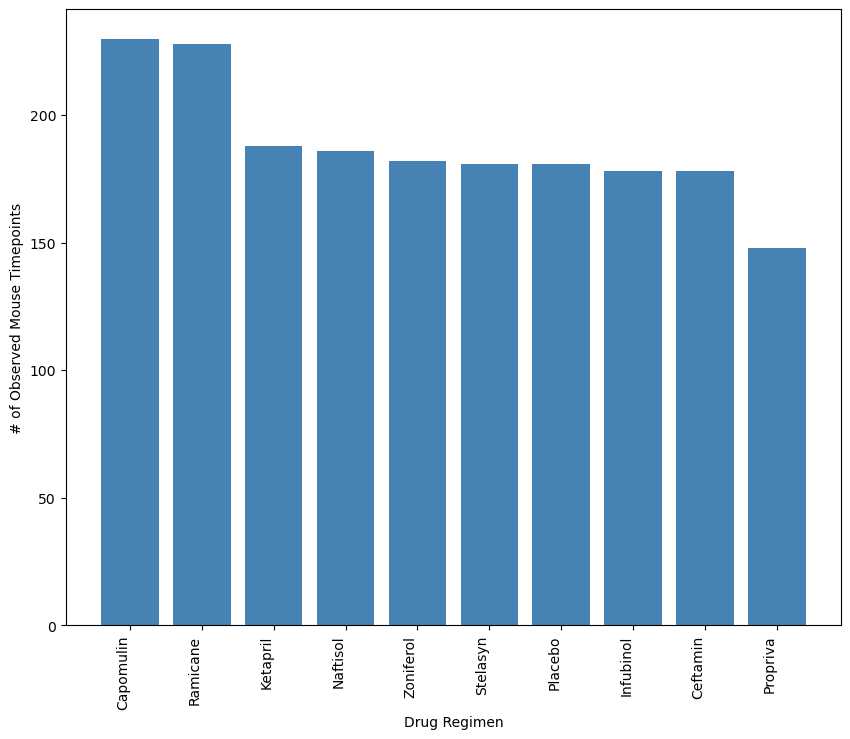

In [21]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Considering that we already groupedby regimen_counts = combined_data_cleaned['Drug Regimen'].value_counts()

#Get values for plotting
drug_regimens = regimen_counts.index
row_counts = regimen_counts.values

# Creating a bar plot using Pyplot
plt.figure(figsize=(10, 8))
plt.bar(drug_regimens, row_counts, color='SteelBlue')

# Set the labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate tick labels
plt.xticks(rotation=90, ha='right')

# Show the plot
plt.show()

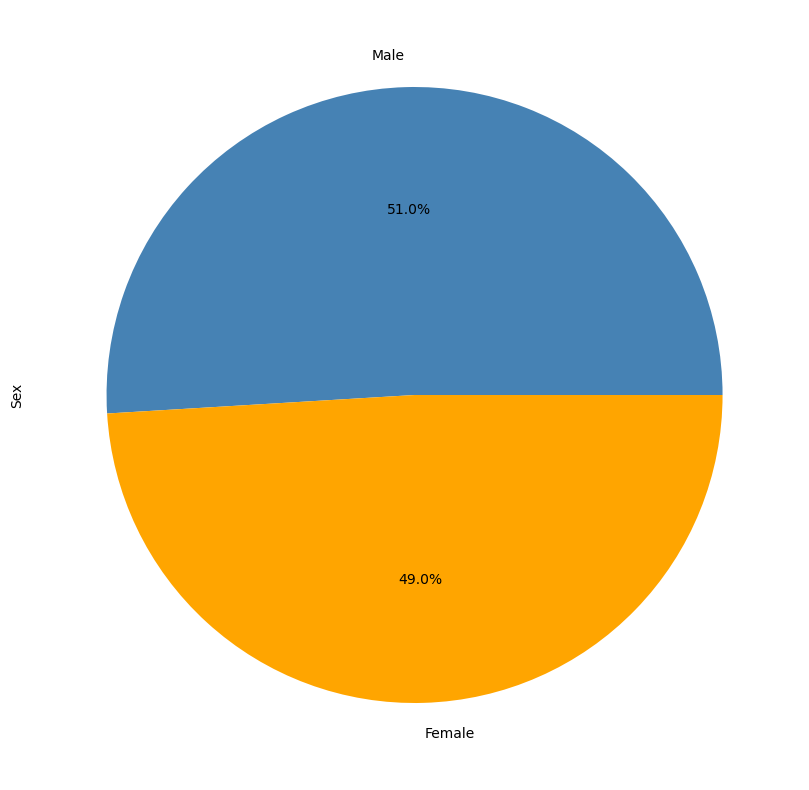

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Groupby 'Sex' and count the number of mice for each gender
s_distribution = combined_data_cleaned['Sex'].value_counts()

# Creating a pie plot
Y_label = s_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['SteelBlue', 'orange'], figsize=(10, 10))

# Set value of Y label to 'Sex'
Y_label.set_ylabel('Sex') 

# Show the plot
plt.show()

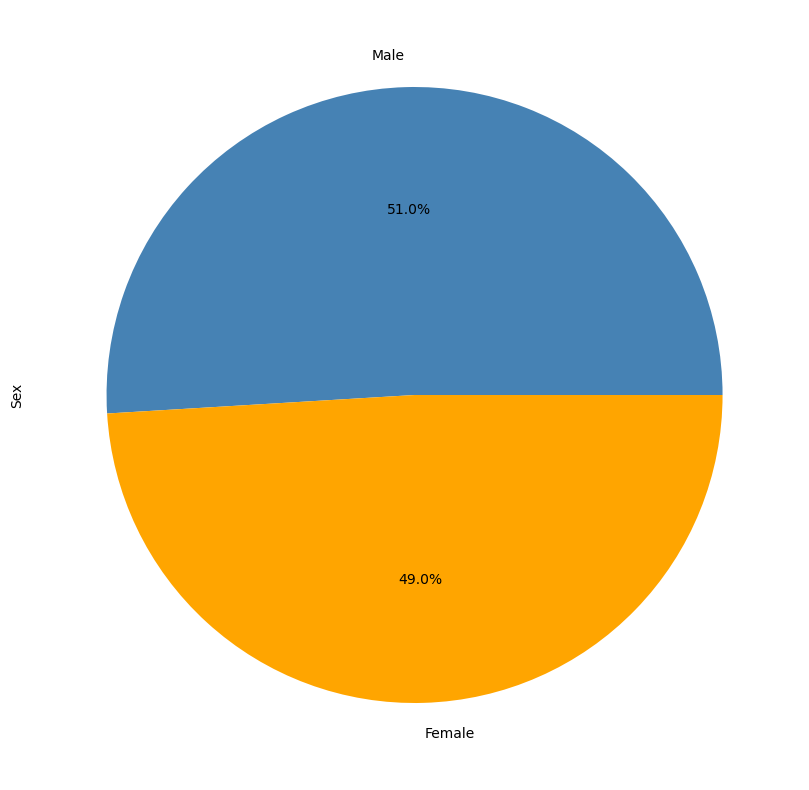

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Since we already groupedby for the previous chart, using the same values:

# Create a pie plot using Pyplot
plt.figure(figsize=(10, 10))
plt.pie(s_distribution, labels=s_distribution.index, autopct='%1.1f%%', colors=['SteelBlue', 'orange'])

# Set the Y label
plt.ylabel('Sex')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
